In [1]:
#Question1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Z:\\S-5\\1.Machine Learning\\hair_loss.csv')

# Select one feature and one target column
X = df[['total_protein']]  # Make X a 2D array by using double square brackets
y = df['hair_fall']  # the numerical target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict the training data
y_train_pred = reg.predict(X_train)

In [2]:
#Question2
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Perform prediction on training data
y_train_pred = reg.predict(X_train)

# Perform prediction on test data
y_test_pred = reg.predict(X_test)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R² Score: {r2_train}\n")

print(f"Test Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R² Score: {r2_test}")

Training Metrics:
MSE: 2.9253057286414004
RMSE: 1.7103525158988133
MAPE: 1876970124550998.0
R² Score: 2.1882040845966344e-08

Test Metrics:
MSE: 2.9280894761309413
RMSE: 1.711166115878567
MAPE: 1892214993429528.5
R² Score: -8.816033972181003e-06


In [3]:
#Question3
X = df[['total_protein', 'total_keratine', 'hair_texture','vitamin', 'manganese', 'iron','calcium', 'body_water_content', 'stress_level','liver_data']]
y = df['hair_fall'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculate the performance metrics as shown in A2
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = mse_train ** 0.5
rmse_test = mse_test ** 0.5

mape_train = (abs(y_train - y_train_pred) / y_train).mean() * 100
mape_test = (abs(y_test - y_test_pred) / y_test).mean() * 100

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2f}%, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%, R²: {r2_test:.2f}")


Training MSE: 2.93, RMSE: 1.71, MAPE: inf%, R²: 0.00
Test MSE: 2.93, RMSE: 1.71, MAPE: inf%, R²: -0.00


In [4]:
#Question4
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset 
df = pd.read_csv('Z:\\S-5\\1.Machine Learning\\hair_loss.csv')

# Select the feature columns only 
X = df.drop(columns=['total_protein', 'total_keratine', 'hair_texture','vitamin', 'manganese', 'iron','calcium', 'body_water_content', 'stress_level','liver_data']) 
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_
print("Cluster Labels:")
print(labels)

# Get the cluster centers
centers = kmeans.cluster_centers_
print("\nCluster Centers:")
print(centers)

# Add the cluster labels to the original dataframe for reference
df['Cluster'] = labels
print("\nData with Cluster Labels:")
print(df.head())

Cluster Labels:
[0 1 0 ... 0 1 1]

Cluster Centers:
[[ 0.87961662]
 [-0.87722731]]

Data with Cluster Labels:
   total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0            312             100            14      249         87    55   
1             52             207             3      425        387     1   
2            170             197            11      140        199    91   
3            256             334            19      358        120     3   
4            309             185            58      207        329   301   

   calcium  body_water_content  stress_level  liver_data  hair_fall  Cluster  
0      333                  44            41         368          4        0  
1      182                  26            65          41          1        1  
2      414                  30            54          90          4        0  
3       35                  48            45          65          2        1  
4      345                  23        

In [5]:
#Question5
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming X_train is your training data without the target variable
# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_train, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Calculate the Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print(f"Calinski-Harabasz Score: {ch_score}")

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(X_train, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.10454573836725185
Calinski-Harabasz Score: 8273.525071300643
Davies-Bouldin Index: 2.8618333430572434


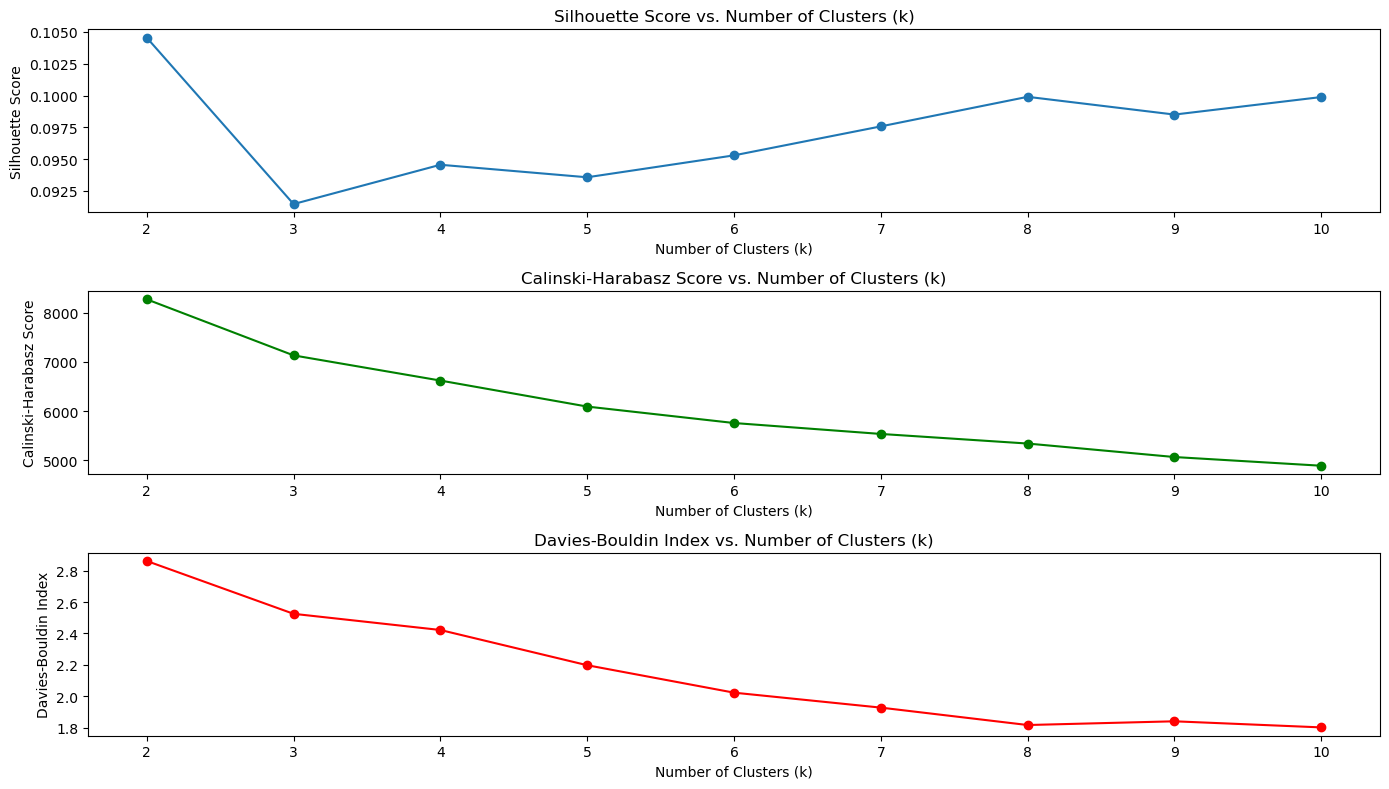

In [6]:
#Question6
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Initialize lists to store the scores for different values of k
silhouette_scores = []
ch_scores = []
db_scores = []

# Define the range of k values to test
k_values = range(2, 11)

# Loop over the range of k values
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    
    # Calculate the Silhouette Score
    sil_score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    # Calculate the Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
    ch_scores.append(ch_score)
    
    # Calculate the Davies-Bouldin Index
    db_index = davies_bouldin_score(X_train, kmeans.labels_)
    db_scores.append(db_index)

# Plot the scores for each k value
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(3, 1, 2)
plt.plot(k_values, ch_scores, marker='o', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(3, 1, 3)
plt.plot(k_values, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

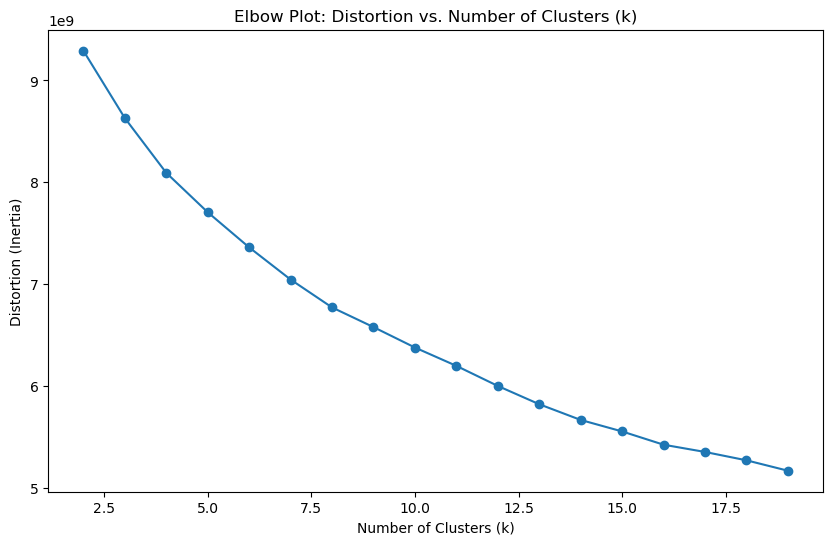

In [7]:
#Question7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store the distortions (inertia values) for different k values
distortions = []

# Define the range of k values to test
k_values = range(2, 20)

# Loop over the range of k values
for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    
    # Append the inertia (within-cluster sum of squares) to the distortions list
    distortions.append(kmeans.inertia_)

# Plot the distortions for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Plot: Distortion vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()